In [3]:
# # IMPORTS
# astronomy
from astropy.io import fits
# plotting 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import matplotlib as mpl
# data 
import numpy as np
# file IO
import csv
# my python files 
import match
import v2_AGN_DataAndPlotting as adp

# Read Data

In [4]:
def PrintNumber(myList) : 
    # make list of AGN names for printting info 
    agnTypeNames = ['MIR:\t', 'Xray:\t']
    # print name and number of items in list 
    for name, row in zip(agnTypeNames, myList) : 
        print(name, row.shape)

# constants for AGN type index
MIR  = 0    
XRAY = 1

In [5]:
# read AGN IDs
agnIDs = adp.ReadFile(adp.path_csv+'\\v2_AGNid_Xray_MIR.csv')

# convert agnIDs into list of integer numpy arrays 
agnIDs_npArray = []
for row in agnIDs : 
    agnIDs_npArray.append(np.array(row, dtype=int))

Cropped:  ['Row 1 = MIR selected AGN (Donley et al, 2012) with id, redshift, IRAC, and 24um (n=900). Row 2 = X-ray selected AGN (Lx > 10^43 erg/s) with id, redshift, IRAC, and 24um (n=1775). ']


In [6]:
# read redshifts
zAll = np.array(adp.ReadFile(adp.path_cat+'\COSMOS_z_matches.csv'))
zID, zZ = zAll.T
# get correct data type
zID = np.array(zID, dtype=int)
zZ  = np.array(zZ,  dtype=float)
# apply mask to remove bad redshifts
mask_z = (zZ >= 0) & (zZ < 99)
zID = zID[mask_z]
zZ  = zZ[mask_z]
# print info
print('Number of sources w/ z:', len(zID))

Cropped:  ['ID', 'z']
Number of sources w/ z: 485793


In [7]:
agn_z = []
agn_ID_wZ = []

for row in agnIDs_npArray : 
    # match redshift against AGN IDs
    key_z_agn, key_agn_z = match.match(zID, row)
    # get redshift array for AGN
    agn_z.append(zZ[key_z_agn])
    # get AGN ID arrays w/ redshifts
    agn_ID_wZ.append(row[key_agn_z])

PrintNumber(agn_z)

MIR:	 (900,)
Xray:	 (1775,)


# Make Redshift Histogram 

In [8]:
def MeanLineForHist(x,c='k',xtext=0.998, ytext=0.94, horizAlign='right') :
    mean = np.array(x).mean()
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(mean, color=c, linestyle='dashed', linewidth=2)
    plt.text(mean*xtext, max_ylim*ytext, 'Mean: {:.1f}'.format(mean), c=c, horizontalalignment=horizAlign)

In [9]:
def RedshiftHist_one(
    x,
    saveStr=''
):
    # set style
    adp.SetStyle()

    # plot
    plt.hist(x, bins=np.arange(0,7,0.25), color='gray')

    # set height to +10% max value
    min_ylim, max_ylim = plt.ylim()
    plt.ylim(ymin=0, ymax=max_ylim+0.1*max_ylim)

    # plot mean line
    MeanLineForHist(x,xtext=0.95)

    # ticks
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    # set axis lables
    plt.xlabel('z')
    plt.ylabel('Number')

    # save
    if(saveStr) :
        adp.Save(saveStr)

    # finish plot
    plt.show()

    # output data
    print('Number of soruces:\t', len(x))
    print('Minimum:\t\t', min(x))
    print('Maximum:\t\t', max(x))

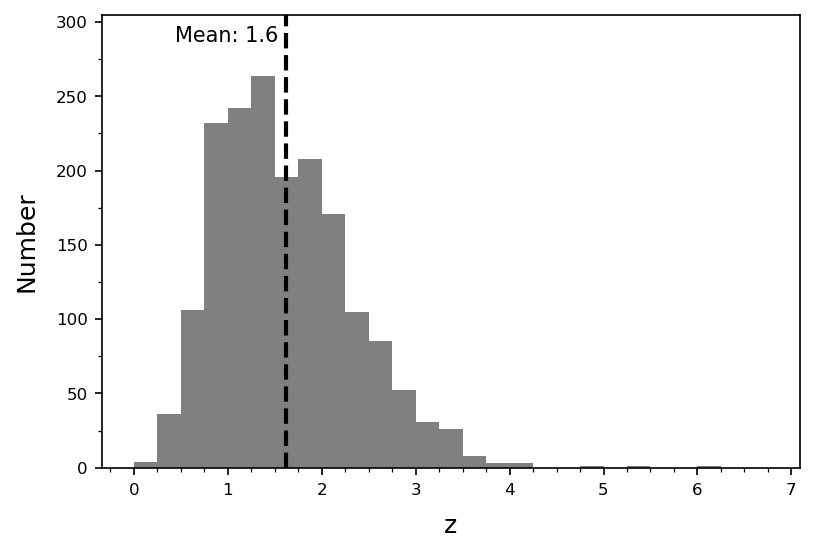

Number of soruces:	 1775
Minimum:		 0.104
Maximum:		 6.062


In [10]:
# X-ray selected AGN 
RedshiftHist_one(agn_z[XRAY], saveStr=adp.path_fig+'\\v2_zhist_XraySelected.png')

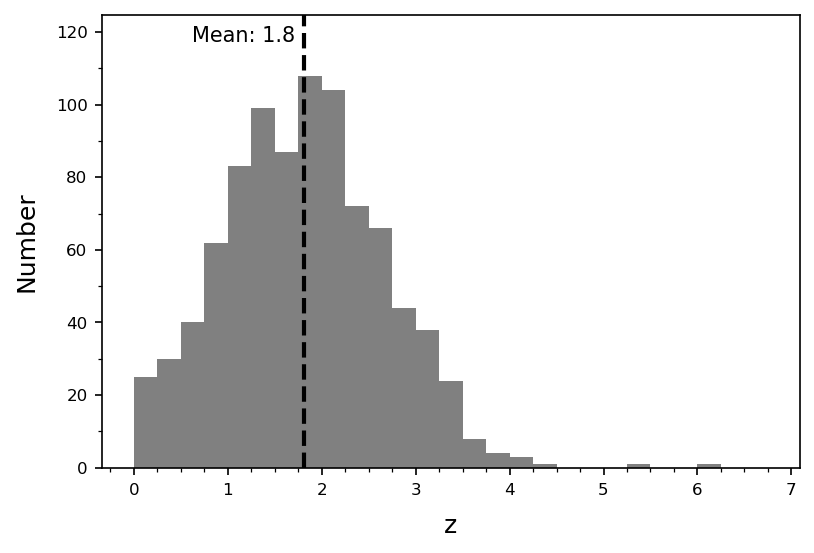

Number of soruces:	 900
Minimum:		 0.0
Maximum:		 6.062


In [11]:
# MIR selected AGN 
RedshiftHist_one(agn_z[MIR], saveStr=adp.path_fig+'\\v2_zhist_MIRSelected.png')